<a href="https://colab.research.google.com/github/cubebarn/Ai-Masterclass/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision matplotlib numpy

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 15.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 300kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.02MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 18.0MB/s]


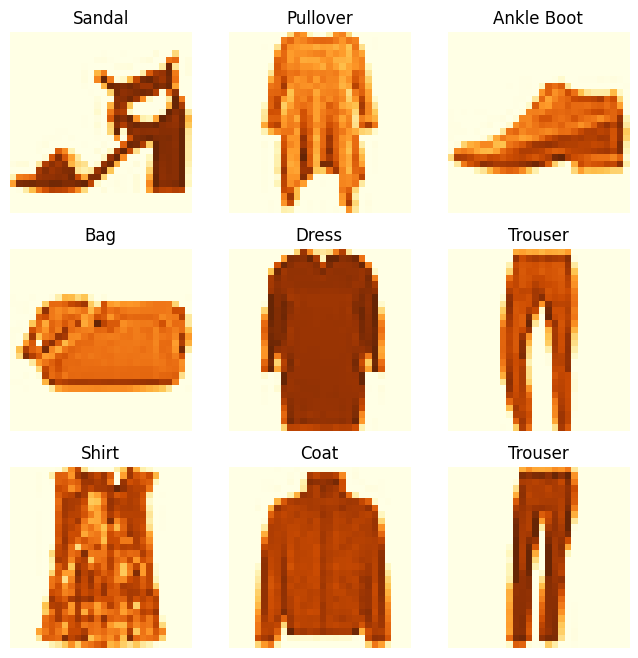

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",

}
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="YlOrBr")

plt.show()

In [ ]:
import os
import pandas as pd
from torchvision.io import decode_image


class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None,target_transform=None):
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform


  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = decode_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label




In [ ]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
  self.img_labels = pd.read_csv(annotations_file)
  selfimg_dir = img_dir
  self.transform = transform
  self.target_transform = target_transform


In [ ]:
def __len__(self):
  return len(self.img_labels)

In [ ]:
def __getitem__(self, idx):
  img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
  image = decode_image(img_path)
  label = self.img_labels.iloc[idx, 1]
  if self.transform:
    image = self.transform(image)
  if self.target_transform:
    label = self.target_transform(label)
  return image, label

In [ ]:
from torch.utils.data import DataLoader

training_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True )

Feature batch shape: torch.Size([64, 1, 28, 28])
labels batch shape: torch.Size([64])


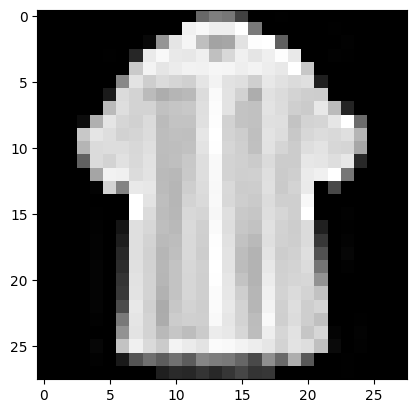

Label: 6


In [ ]:
train_features, train_labels = next(iter(training_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

In [ ]:
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [ ]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms



In [ ]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10),
    )

  def forward(self, x):
    x= self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred= pred_probab.argmax(1)
print(f"Prediced class: {y_pred}")

Prediced class: tensor([5])


In [ ]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [ ]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())


torch.Size([3, 20])


In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.2790,  0.4228,  0.4363, -0.0501,  0.1053,  0.4049,  0.7539,  0.0133,
         -0.5356, -0.0264, -0.2218,  0.4888, -0.0545, -0.0712,  0.5216,  0.2728,
          0.2080, -0.2202, -0.8285,  0.2155],
        [-0.2832,  0.3033,  0.2713,  0.3571,  0.0941,  0.6313,  0.2691, -0.1471,
         -0.5382,  0.0240, -0.3130,  0.3893,  0.3002, -0.1249,  0.4688,  0.2921,
          0.3677, -0.1838, -0.6603,  0.1721],
        [-0.3639,  0.0835,  0.6079,  0.0842,  0.2302,  0.4286,  0.3499,  0.0338,
         -0.6534, -0.1959, -0.5279,  0.5507, -0.0117, -0.0817,  0.5141,  0.0818,
         -0.1254, -0.0564, -0.5256,  0.1474]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.4228, 0.4363, 0.0000, 0.1053, 0.4049, 0.7539, 0.0133, 0.0000,
         0.0000, 0.0000, 0.4888, 0.0000, 0.0000, 0.5216, 0.2728, 0.2080, 0.0000,
         0.0000, 0.2155],
        [0.0000, 0.3033, 0.2713, 0.3571, 0.0941, 0.6313, 0.2691, 0.0000, 0.0000,
         0.0240, 0.0000, 0.3893, 0.3002, 0.0000, 0.46

In [ ]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
    )

input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [ ]:
print(f"Model structure: {model}\n\n")
for name, param in model.named_parameters():
  print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0235, -0.0027, -0.0050,  ...,  0.0344, -0.0204,  0.0109],
        [-0.0202,  0.0105,  0.0017,  ...,  0.0211, -0.0001, -0.0096]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0007, -0.0111], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0006,  0.0369,  0.0247,  ...,  0.0285,  0.0173,  0.0102],
        [-0.0339, -0.0075,  0.0003,  ...,  0.0411,  0.0001,  0.0434]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 

In [ ]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [ ]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7f67863ee5c0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f67863ef640>


In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1439, 0.0430, 0.2643],
        [0.1439, 0.0430, 0.2643],
        [0.1439, 0.0430, 0.2643],
        [0.1439, 0.0430, 0.2643],
        [0.1439, 0.0430, 0.2643]])
tensor([0.1439, 0.0430, 0.2643])


In [ ]:
z= torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
  z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [ ]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [ ]:
lss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X, y) in enumerate(dataloader):
    pred = model(X)
    loss = loss_fn(pred, y)

    loss.backword()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * batch_size + len(X)
      print(f"loss: {loss:>7f} [{current:5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
  model.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)

  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error:\n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

# Define the training loop with the corrected 'backward' method
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X, y) in enumerate(dataloader):
    pred = model(X)
    loss = loss_fn(pred, y)

    # Corrected typo: 'backword' to 'backward'
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * batch_size + len(X)
      print(f"loss: {loss:>7f} [{current:5d}/{size:>5d}]")

# Define the test loop (included for completeness as it was part of the original function definition cell)
def test_loop(dataloader, model, loss_fn):
  model.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)

  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error:\n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")

epoch = 20
for t in range(epoch):
  print(f"Epoch {t+1}\n------------------------------------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
  print("Done")

Epoch 1
------------------------------------------------
loss: 2.305066 [   64/60000]
loss: 2.297926 [ 6464/60000]
loss: 2.279566 [12864/60000]
loss: 2.269181 [19264/60000]
loss: 2.260287 [25664/60000]
loss: 2.221916 [32064/60000]
loss: 2.236170 [38464/60000]
loss: 2.196949 [44864/60000]
loss: 2.188094 [51264/60000]
loss: 2.154066 [57664/60000]
Test Error:
 Accuracy: 32.2%, Avg loss: 2.151354

Done
Epoch 2
------------------------------------------------
loss: 2.162267 [   64/60000]
loss: 2.152303 [ 6464/60000]
loss: 2.096508 [12864/60000]
loss: 2.113049 [19264/60000]
loss: 2.064908 [25664/60000]
loss: 1.994643 [32064/60000]
loss: 2.036633 [38464/60000]
loss: 1.953122 [44864/60000]
loss: 1.958131 [51264/60000]
loss: 1.885356 [57664/60000]
Test Error:
 Accuracy: 54.3%, Avg loss: 1.881904

Done
Epoch 3
------------------------------------------------
loss: 1.919184 [   64/60000]
loss: 1.882988 [ 6464/60000]
loss: 1.768993 [12864/60000]
loss: 1.813877 [19264/60000]
loss: 1.703911 [25664/6